<a href="https://colab.research.google.com/github/gitydel/Global-Food-Waste-Analysis-Visualization/blob/main/data_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot styles
plt.style.use('ggplot')  # Use a valid Matplotlib style
sns.set_palette('Set2')

# Load the dataset (assuming it's uploaded to Colab)
file_path = "/content/sample_data/Food Waste data and research - by country (1).csv"

try:
    df = pd.read_csv(file_path)
    # View the first few rows of the dataset
    print(df.head())
except FileNotFoundError as e:
    print(f"File not found: {e}")


       Country  combined figures (kg/capita/year)  \
0  Afghanistan                                126   
1      Albania                                127   
2      Algeria                                135   
3      Andorra                                123   
4       Angola                                144   

   Household estimate (kg/capita/year)  Household estimate (tonnes/year)  \
0                                   82                           3109153   
1                                   83                            238492   
2                                   91                           3918529   
3                                   84                              6497   
4                                  100                           3169523   

   Retail estimate (kg/capita/year)  Retail estimate (tonnes/year)  \
0                                16                         594982   
1                                16                          45058   
2             

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing data if necessary or handle missing values
df_cleaned = df.dropna()

# For potential new variables, you might want to analyze the total waste per country
df_cleaned['Total Waste (tonnes/year)'] = (df_cleaned['Household estimate (tonnes/year)'] +
                                           df_cleaned['Retail estimate (tonnes/year)'] +
                                           df_cleaned['Food service estimate (tonnes/year)'])

# View updated dataset
df_cleaned.head()





Country                                   0
combined figures (kg/capita/year)         0
Household estimate (kg/capita/year)       0
Household estimate (tonnes/year)          0
Retail estimate (kg/capita/year)          0
Retail estimate (tonnes/year)             0
Food service estimate (kg/capita/year)    0
Food service estimate (tonnes/year)       0
Confidence in estimate                    0
M49 code                                  0
Region                                    0
Source                                    0
dtype: int64


,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source,Total Waste (tonnes/year)
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...,4755918
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...,363201
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...,5782224
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...,9456
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...,4547186


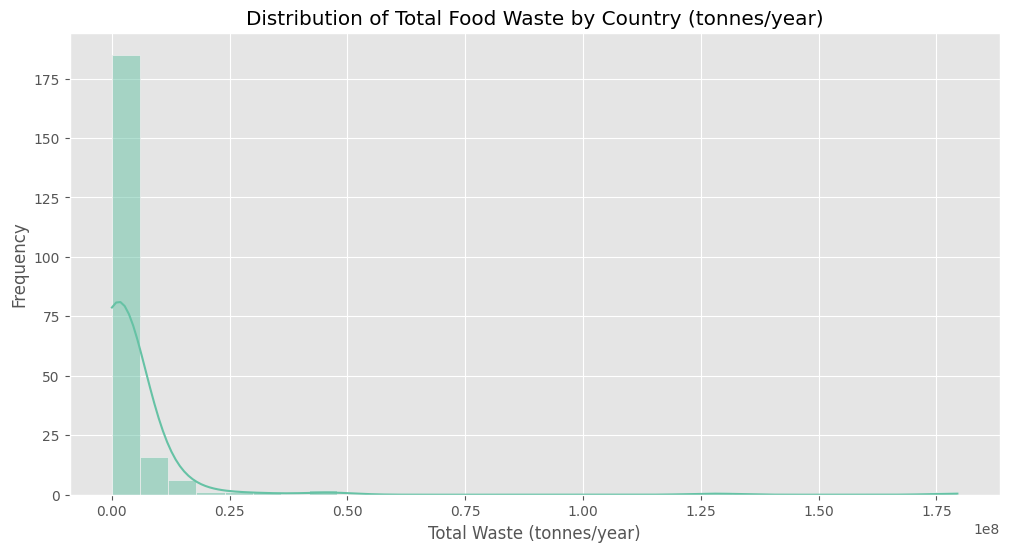

In [ ]:

# Distribution of total food waste per country
plt.figure(figsize=(12,6))
sns.histplot(df_cleaned['Total Waste (tonnes/year)'], bins=30, kde=True)
plt.title('Distribution of Total Food Waste by Country (tonnes/year)')
plt.xlabel('Total Waste (tonnes/year)')
plt.ylabel('Frequency')
plt.show()


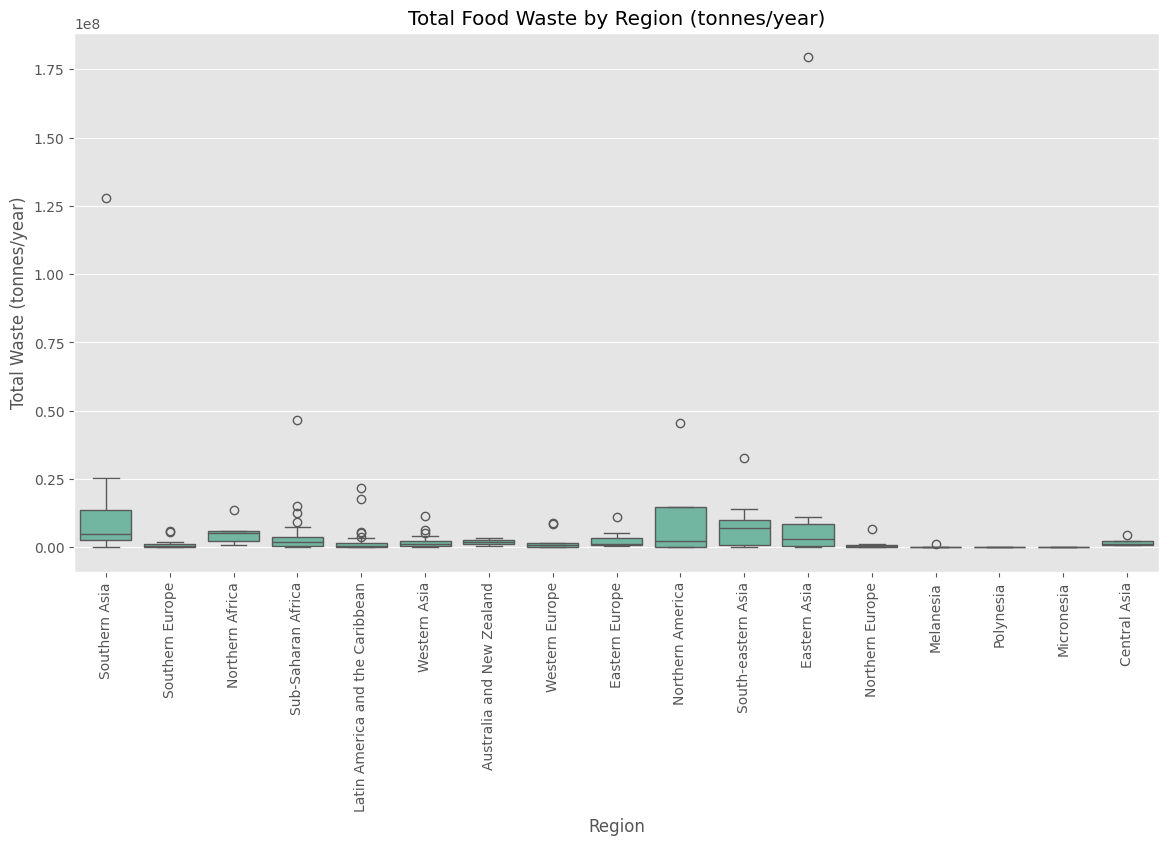

In [ ]:
# Food waste by region
plt.figure(figsize=(14,7))
sns.boxplot(x='Region', y='Total Waste (tonnes/year)', data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Total Food Waste by Region (tonnes/year)')
plt.xlabel('Region')
plt.ylabel('Total Waste (tonnes/year)')
plt.show()




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be plac

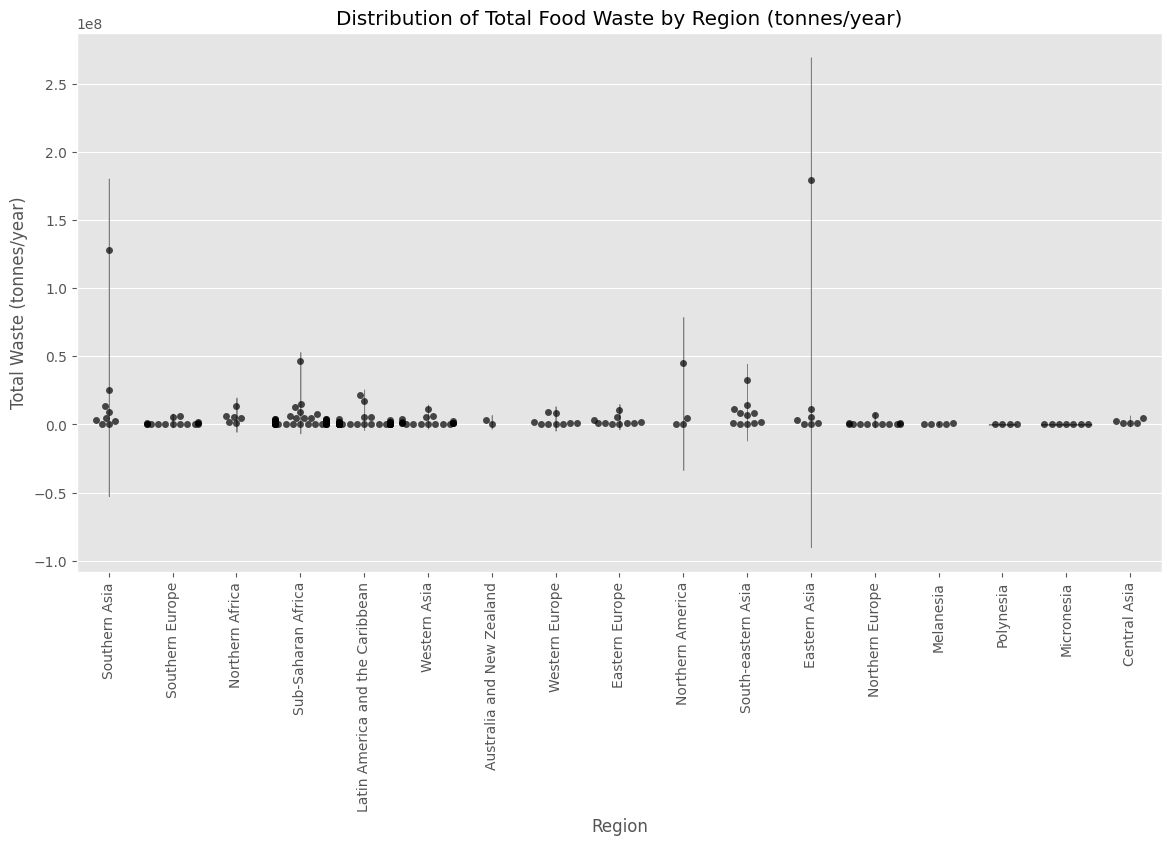

In [ ]:
plt.figure(figsize=(14,7))

# Create a violin plot to show the distribution
sns.violinplot(x='Region', y='Total Waste (tonnes/year)', data=df_cleaned, inner=None, color="lightgray")

# Overlay a swarm plot to show individual data points
sns.swarmplot(x='Region', y='Total Waste (tonnes/year)', data=df_cleaned, color='black', alpha=0.7)

plt.xticks(rotation=90)
plt.title('Distribution of Total Food Waste by Region (tonnes/year)')
plt.xlabel('Region')
plt.ylabel('Total Waste (tonnes/year)')
plt.show()


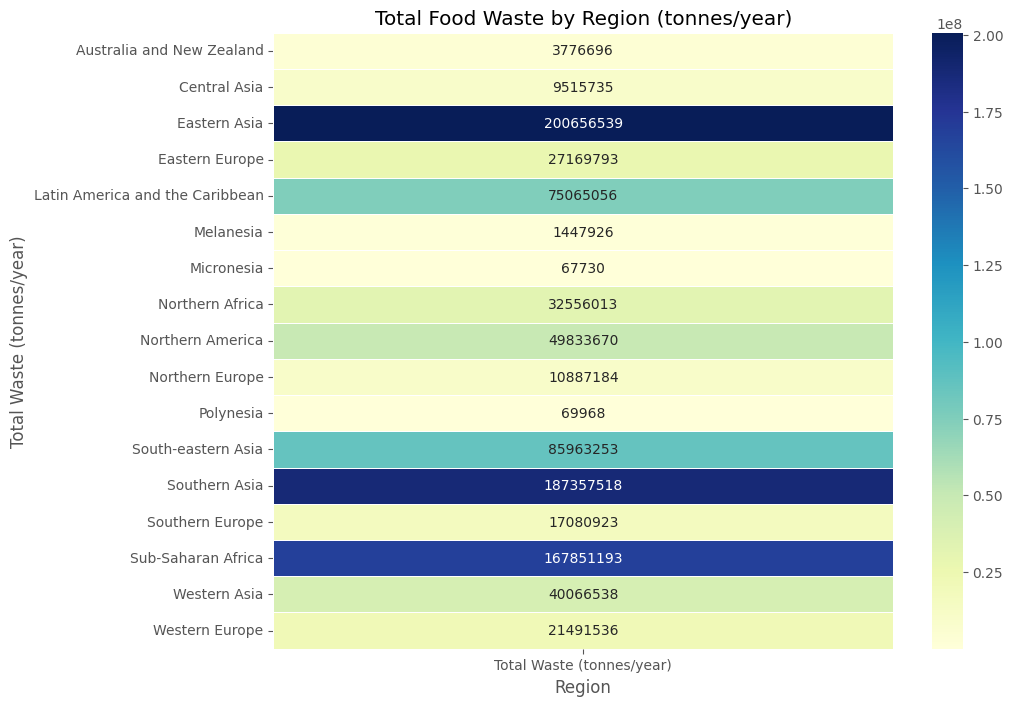

In [ ]:
# Create a pivot table to aggregate food waste by region
pivot_table = df_cleaned.pivot_table(values='Total Waste (tonnes/year)', index='Region', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)

plt.title('Total Food Waste by Region (tonnes/year)')
plt.xlabel('Region')
plt.ylabel('Total Waste (tonnes/year)')
plt.show()



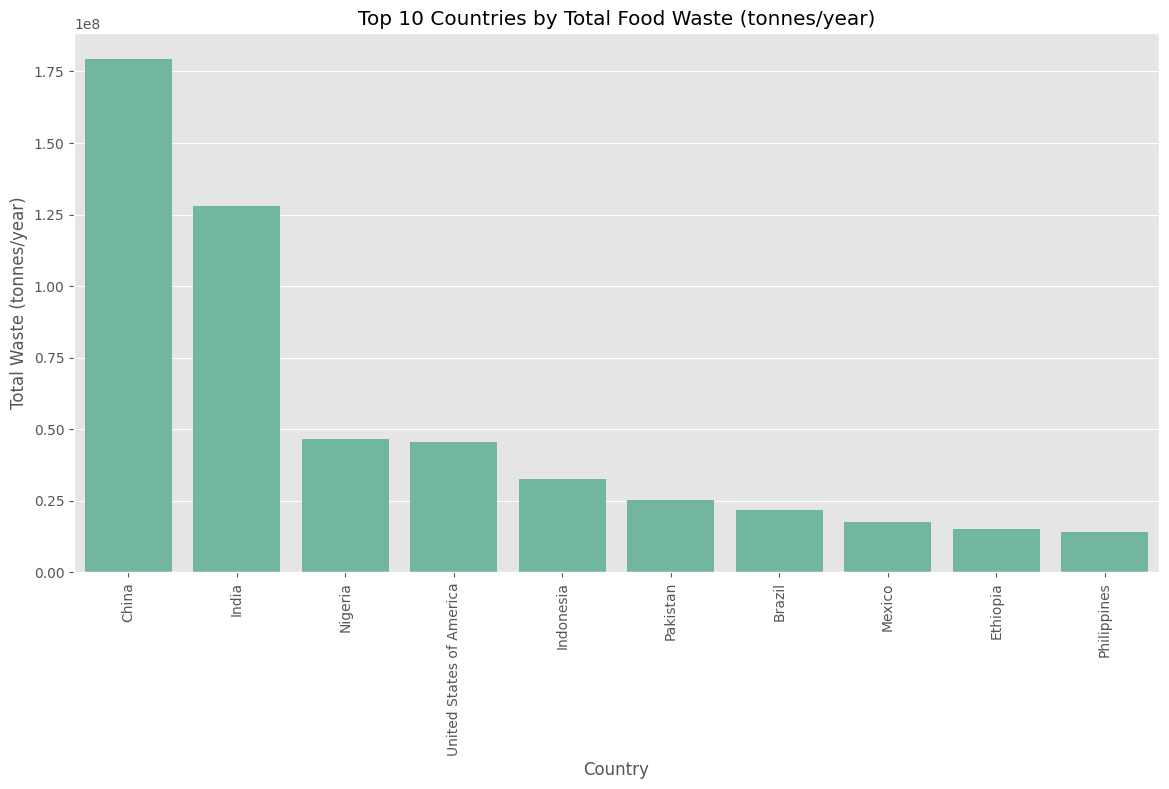

In [ ]:
# Barplot of food waste per country (top 10)
top_countries = df_cleaned.nlargest(10, 'Total Waste (tonnes/year)')
plt.figure(figsize=(14,7))
sns.barplot(x='Country', y='Total Waste (tonnes/year)', data=top_countries)
plt.title('Top 10 Countries by Total Food Waste (tonnes/year)')
plt.xlabel('Country')
plt.ylabel('Total Waste (tonnes/year)')
plt.xticks(rotation=90)
plt.show()


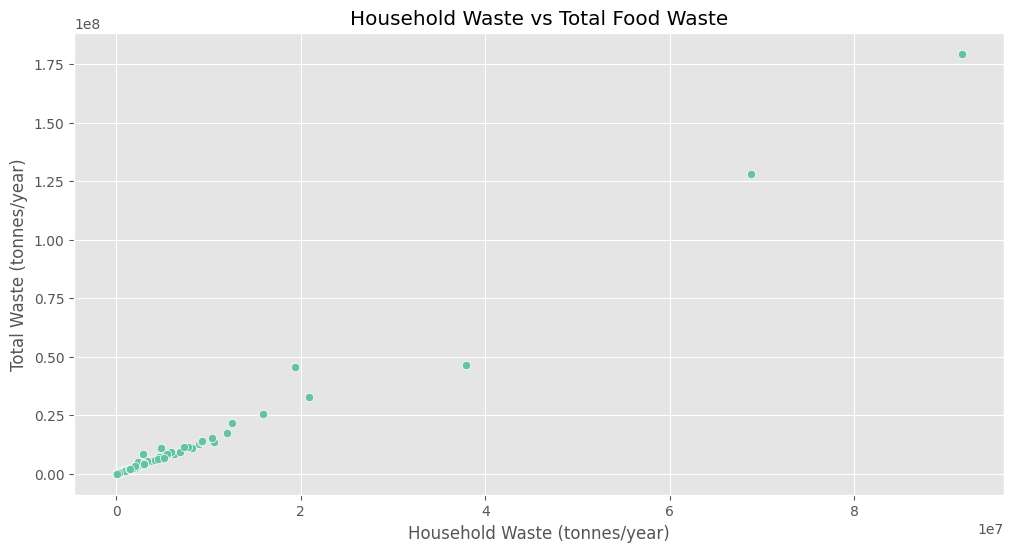

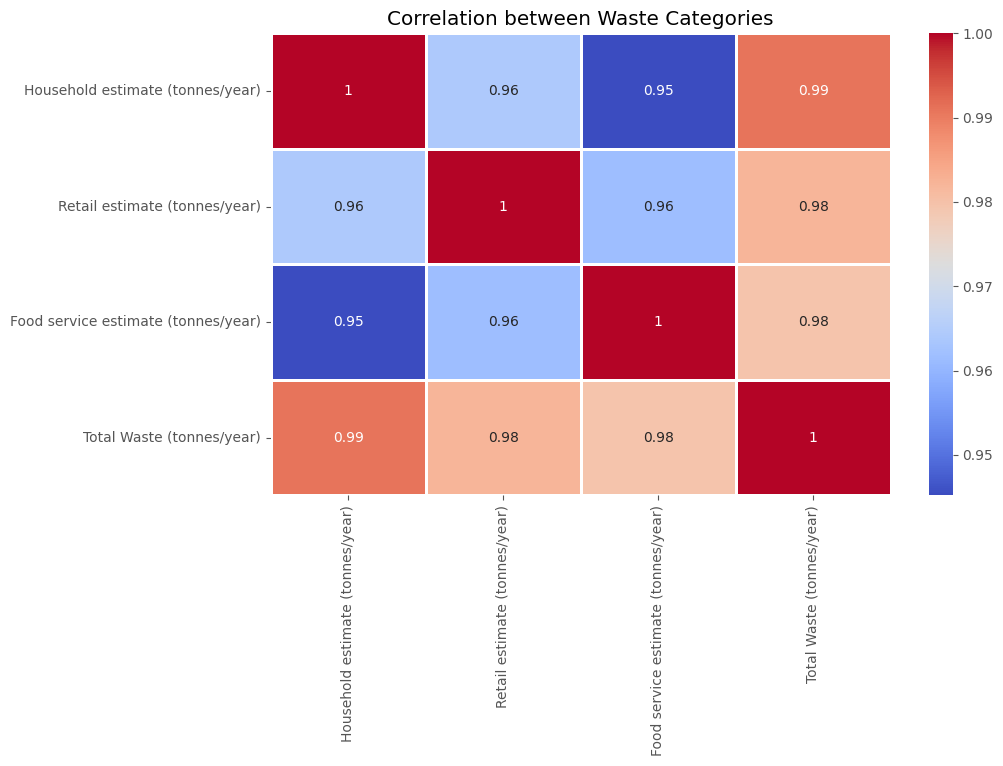

In [ ]:
# Relationship between household waste and total waste
plt.figure(figsize=(12,6))
sns.scatterplot(x='Household estimate (tonnes/year)', y='Total Waste (tonnes/year)', data=df_cleaned)
plt.title('Household Waste vs Total Food Waste')
plt.xlabel('Household Waste (tonnes/year)')
plt.ylabel('Total Waste (tonnes/year)')
plt.show()

# Correlation heatmap to identify relationships between different waste types
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned[['Household estimate (tonnes/year)', 'Retail estimate (tonnes/year)',
                        'Food service estimate (tonnes/year)', 'Total Waste (tonnes/year)']].corr(),
            annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation between Waste Categories')
plt.show()



In [ ]:
!pip install geodatasets


In [ ]:
import geopandas as gpd
import geodatasets


# Load your local shapefile (change path as needed)
world = gpd.read_file("/content/sample_data/ne_110m_admin_0_countries.shp")

# Continue with your merging or analysis




DataSourceError: /content/sample_data/ne_110m_admin_0_countries.shp: No such file or directory

In [ ]:
!pip install geopandas fiona




In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing data if necessary or handle missing values
df_cleaned = df.dropna()

# Create a new column 'Total Waste (tonnes/year)' by summing the relevant columns
df_cleaned['Total Waste (tonnes/year)'] = (df_cleaned['Household estimate (tonnes/year)'] +
                                           df_cleaned['Retail estimate (tonnes/year)'] +
                                           df_cleaned['Food service estimate (tonnes/year)'])

# View updated dataset
print(df_cleaned.head())

# Save the updated dataframe to the original CSV file or to a new file
output_file_path = "/content/sample_data/updated_food_waste_data.csv"  # Change path as needed
df_cleaned.to_csv(output_file_path, index=False)  # Save without row indices

print(f"Data saved to {output_file_path}")






Country                                   0
combined figures (kg/capita/year)         0
Household estimate (kg/capita/year)       0
Household estimate (tonnes/year)          0
Retail estimate (kg/capita/year)          0
Retail estimate (tonnes/year)             0
Food service estimate (kg/capita/year)    0
Food service estimate (tonnes/year)       0
Confidence in estimate                    0
M49 code                                  0
Region                                    0
Source                                    0
dtype: int64
       Country  combined figures (kg/capita/year)  \
0  Afghanistan                                126   
1      Albania                                127   
2      Algeria                                135   
3      Andorra                                123   
4       Angola                                144   

   Household estimate (kg/capita/year)  Household estimate (tonnes/year)  \
0                                   82                          

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

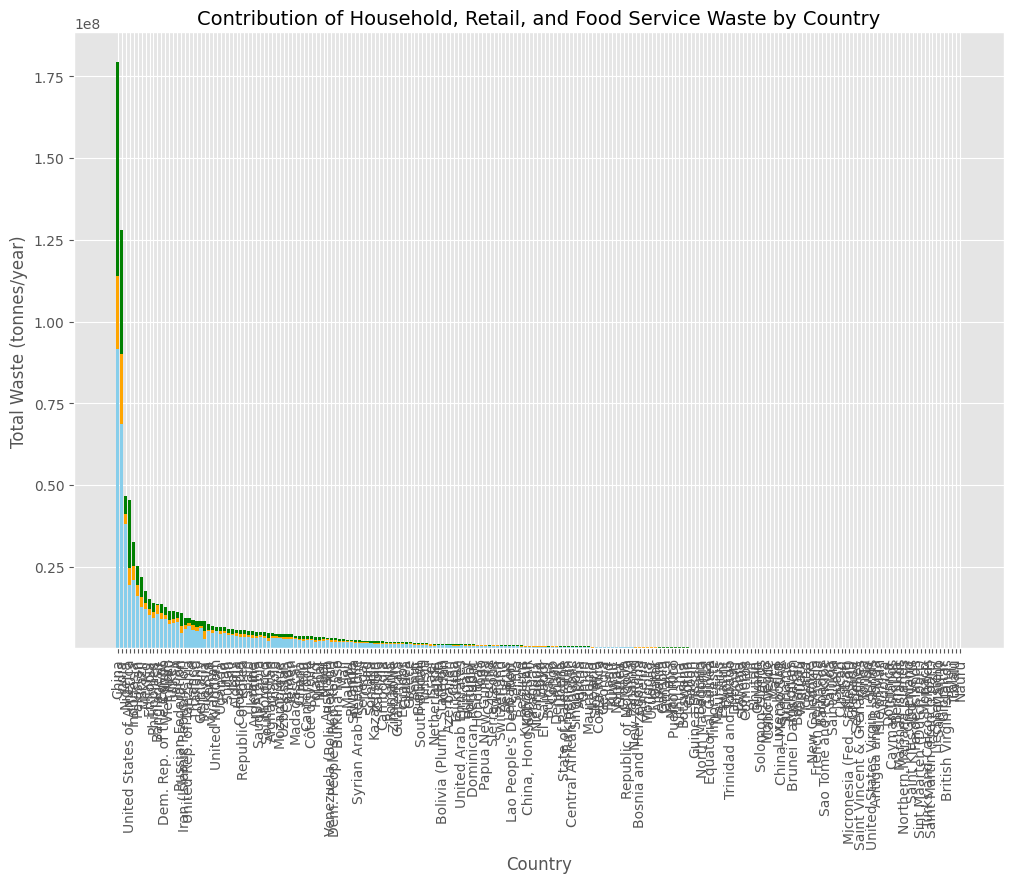

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation: Summing the waste types to calculate total waste per country
df['Total waste (tonnes/year)'] = df['Household estimate (tonnes/year)'] + df['Retail estimate (tonnes/year)'] + df['Food service estimate (tonnes/year)']

# Sorting countries by total waste for better visualization
df_sorted = df.sort_values('Total waste (tonnes/year)', ascending=False)

# Plotting a stacked bar chart to show contributions of different waste types by country
plt.figure(figsize=(12, 8))

# Stacked bar plot for Household, Retail, and Food Service waste
plt.bar(df_sorted['Country'], df_sorted['Household estimate (tonnes/year)'], label='Household Waste', color='skyblue')
plt.bar(df_sorted['Country'], df_sorted['Retail estimate (tonnes/year)'], bottom=df_sorted['Household estimate (tonnes/year)'], label='Retail Waste', color='orange')
plt.bar(df_sorted['Country'], df_sorted['Food service estimate (tonnes/year)'],
        bottom=df_sorted['Household estimate (tonnes/year)'] + df_sorted['Retail estimate (tonnes/year)'],
        label='Food Service Waste', color='green')

# Adding title and labels
plt.title('Contribution of Household, Retail, and Food Service Waste by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Waste (tonnes/year)', fontsize=12)
plt.xticks(rotation=90)  # Rotate the country labels for better readability



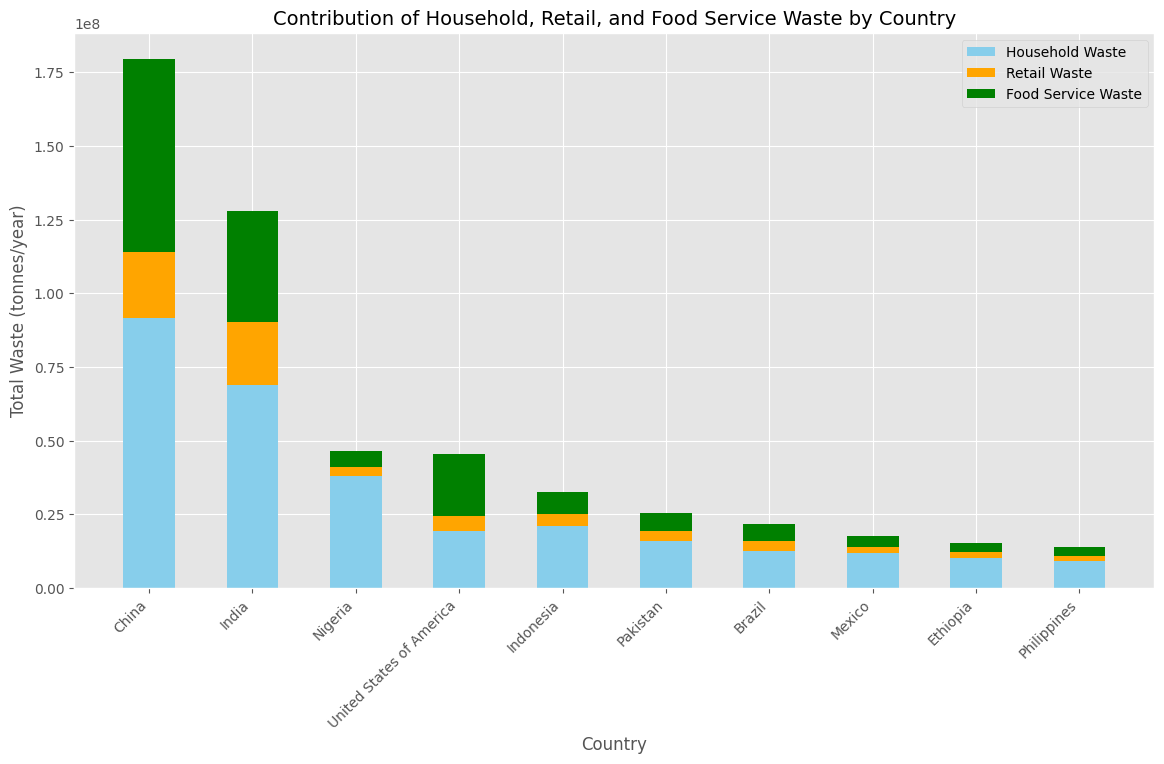

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation: Summing the waste types to calculate total waste per country
df['Total waste (tonnes/year)'] = df['Household estimate (tonnes/year)'] + df['Retail estimate (tonnes/year)'] + df['Food service estimate (tonnes/year)']

# Sorting countries by total waste for better visualization
df_sorted = df.sort_values('Total waste (tonnes/year)', ascending=False)

# Limit the number of countries to avoid overcrowding (e.g., top 10 countries by waste)
df_sorted = df_sorted.head(10)

# Plotting a stacked bar chart to show contributions of different waste types by country
plt.figure(figsize=(12, 8))

# Set bar width
bar_width = 0.5

# Stacked bar plot for Household, Retail, and Food Service waste
plt.bar(df_sorted['Country'], df_sorted['Household estimate (tonnes/year)'], label='Household Waste', color='skyblue', width=bar_width)
plt.bar(df_sorted['Country'], df_sorted['Retail estimate (tonnes/year)'], bottom=df_sorted['Household estimate (tonnes/year)'], label='Retail Waste', color='orange', width=bar_width)
plt.bar(df_sorted['Country'], df_sorted['Food service estimate (tonnes/year)'],
        bottom=df_sorted['Household estimate (tonnes/year)'] + df_sorted['Retail estimate (tonnes/year)'],
        label='Food Service Waste', color='green', width=bar_width)

# Adding title and labels
plt.title('Contribution of Household, Retail, and Food Service Waste by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Waste (tonnes/year)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate and align country labels for readability

# Adding legend to differentiate the waste types
plt.legend(loc='upper right')

# Increase space between the bars to reduce clustering
plt.tight_layout(pad=2)

# Show the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Grouping the data by region and summing the waste estimates for each region
df_region = df.groupby('Region').agg({
    'Household estimate (tonnes/year)': 'sum',
    'Retail estimate (tonnes/year)': 'sum',
    'Food service estimate (tonnes/year)': 'sum'
}).reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Set the positions for the bars
bar_width = 0.2
r1 = np.arange(len(df_region['Region']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bars for each waste type
plt.bar(r1, df_region['Household estimate (tonnes/year)'], color='skyblue', width=bar_width, edgecolor='grey', label='Household Waste')
plt.bar(r2, df_region['Retail estimate (tonnes/year)'], color='orange', width=bar_width, edgecolor='grey', label='Retail Waste')
plt.bar(r3, df_region['Food service estimate (tonnes/year)'], color='green', width=bar_width, edgecolor='grey', label='Food Service Waste')

# Adding title and labels
plt.title('Waste Type Distribution by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Waste (tonnes/year)', fontsize=12)
plt.xt


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map confidence levels to numeric values for color coding
confidence_mapping = {
    'Very Low Confidence': 1,
    'Low Confidence': 2,
    'Medium Confidence': 3,
    'High Confidence': 4
}

# Apply the mapping to the confidence column
df['Confidence Value'] = df['Confidence in estimate'].map(confidence_mapping)

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
scatter = plt.scatter(
    df['combined figures (kg/capita/year)'],
    df['Household estimate (kg/capita/year)'],
    s=df['Household estimate (tonnes/year)'] / 10000,  # Bubble size proportional to total tonnes/year
    c=df['Confidence Value'],  # Color based on confidence value
    cmap='coolwarm',  # Colormap for confidence
    alpha=0.7,  # Transparency
    edgecolors='w',  # White borders for bubbles
    linewidth=1
)

# Add color bar
plt.colorbar(scatter, label='Confidence in Estimate')

# Add labels and title
plt.title('Combined Figures vs Household Waste with Confidence Levels', fontsize=14)
plt.xlabel('Combined Figures (kg/capita/year)', fontsize=12)
plt.ylabel('Household Estimate (kg/capita/year)', fontsize=12)

# Add grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map confidence levels to numeric values for color coding
confidence_mapping = {
    'Very Low Confidence': 1,
    'Low Confidence': 2,
    'Medium Confidence': 3,
    'High Confidence': 4
}

# Apply the mapping to the confidence column
df['Confidence Value'] = df['Confidence in estimate'].map(confidence_mapping)

# Set up the figure size
plt.figure(figsize=(14, 10))

# Create the scatter plot with different markers for types of waste
markers = {'Type A': 'o', 'Type B': 's', 'Type C': '^'}  # Customize types of waste

# Loop through each type of waste to plot
for waste_type, marker in markers.items():
    subset = df[df['Waste Type'] == waste_type]  # Assuming 'Waste Type' is the column name
    scatter = plt.scatter(
        subset['combined figures (kg/capita/year)'],
        subset['Household estimate (kg/capita/year)'],
        s=subset['Household estimate (tonnes/year)'] / 10000,  # Bubble size proportional to total tonnes/year
        c=subset['Confidence Value'],  # Color based on confidence value
        cmap='coolwarm',  # Colormap for confidence
        alpha=0.7,  # Transparency
        edgecolors='w',  # White borders for bubbles
        linewidth=1,
        marker=marker,
        label=waste_type  # Label for legend
    )

# Add color bar
plt.colorbar(scatter, label='Confidence in Estimate')

# Add labels and title
plt.title('Combined Figures vs Household Waste with Confidence Levels', fontsize=16)
plt.xlabel('Combined Figures (kg/capita/year)', fontsize=14)
plt.ylabel('Household Estimate (kg/capita/year)', fontsize=14)

# Annotate with country names
for i, row in df.iterrows():
    plt.annotate(row['Country'], (row['combined figures (kg/capita/year)'], row['Household estimate (kg/capita/year)']),
                 fontsize=8, alpha=0.7)

# Add grid and legend
plt.grid(True)
plt.legend(title='Waste Type')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# 5. Interactive Plot: Proportion of Waste in Each Category per Country
df_cleaned['Household %'] = df_cleaned['Household estimate (tonnes/year)'] / df_cleaned['Total Waste (tonnes/year)'] * 100
df_cleaned['Retail %'] = df_cleaned['Retail estimate (tonnes/year)'] / df_cleaned['Total Waste (tonnes/year)'] * 100
df_cleaned['Food Service %'] = df_cleaned['Food service estimate (tonnes/year)'] / df_cleaned['Total Waste (tonnes/year)'] * 100

# Use Plotly for an interactive stacked bar chart
fig = px.bar(df_cleaned, x='Country', y=['Household %', 'Retail %', 'Food Service %'], title="Proportion of Food Waste by Category in Each Country",
             labels={'value':'% Waste', 'variable':'Category'}, hover_name="Country")
fig.update_layout(barmode='stack')
fig.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a color palette for the regions
palette = sns.color_palette("Set2", df['Region'].nunique())

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
scatter = plt.scatter(
    df['Retail estimate (kg/capita/year)'],
    df['Food service estimate (kg/capita/year)'],
    s=df['Retail estimate (tonnes/year)'] / 10000,  # Bubble size proportional to total retail waste
    c=df['Region'].astype('category').cat.codes,  # Color based on the region
    cmap='tab20',  # Colormap for regions
    alpha=0.7,  # Transparency
    edgecolors='w',  # White borders for bubbles
    linewidth=1
)

# Add color bar
plt.colorbar(scatter, label='Region')

# Add labels and title
plt.title('Retail Waste vs Food Service Waste by Region', fontsize=14)
plt.xlabel('Retail Estimate (kg/capita/year)', fontsize=12)
plt.ylabel('Food Service Estimate (kg/capita/year)', fontsize=12)

# Add grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure we're using the cleaned dataset
# Calculate per capita waste by sector (already in kg/capita/year columns)
df_cleaned['Household Per Capita'] = df_cleaned['Household estimate (kg/capita/year)']
df_cleaned['Retail Per Capita'] = df_cleaned['Retail estimate (kg/capita/year)']
df_cleaned['Food Service Per Capita'] = df_cleaned['Food service estimate (kg/capita/year)']

# Select top 10 contributors based on total food waste per capita
top_countries = df_cleaned.nlargest(10, 'combined figures (kg/capita/year)')

# Reshape data for grouped bar plot
melted_data = top_countries.melt(id_vars=['Country'],
                                 value_vars=['Household Per Capita', 'Retail Per Capita', 'Food Service Per Capita'],
                                 var_name='Sector',
                                 value_name='Waste Per Capita')

# Create a grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=melted_data, x='Country', y='Waste Per Capita', hue='Sector', palette='Set2')
plt.title("Per Capita Food Waste Contribution by Sector (Top 10 Countries)", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Waste Per Capita (kg/year)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Sector", fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile
world = gpd.read_file('/content/sample_data/ne_110m_admin_0_countries.shp')

# Reproject to a projected CRS (e.g., EPSG:3857 for Web Mercator)
world = world.to_crs(epsg=3857)

# Ensure you're using the cleaned dataset
df_cleaned = df_cleaned.copy()

# Identify the top contributor for each waste type
top_household = df_cleaned.loc[df_cleaned['Household estimate (kg/capita/year)'].idxmax()]
top_retail = df_cleaned.loc[df_cleaned['Retail estimate (kg/capita/year)'].idxmax()]
top_food_service = df_cleaned.loc[df_cleaned['Food service estimate (kg/capita/year)'].idxmax()]

# Create a DataFrame for top contributors
top_contributors = pd.DataFrame({
    'Waste Type': ['Household', 'Retail', 'Food Service'],
    'Country': [top_household['Country'], top_retail['Country'], top_food_service['Country']],
    'Value (kg/capita/year)': [top_household['Household estimate (kg/capita/year)'],
                               top_retail['Retail estimate (kg/capita/year)'],
                               top_food_service['Food service estimate (kg/capita/year)']]
})

# Add a column to the world GeoDataFrame to highlight top contributors
world['Top Contributor'] = world['ADMIN'].apply(lambda x: x if x in top_contributors['Country'].values else None)

# Merge top contributor information into the world map for visualization
world = world.merge(top_contributors, left_on='ADMIN', right_on='Country', how='left')

# Plot the world map
plt.figure(figsize=(15, 10))
base = world.boundary.plot(edgecolor='black', linewidth=0.5)
world.plot(ax=base, column='Waste Type', legend=True, cmap='viridis',
           missing_kwds={'color': 'lightgrey'}, legend_kwds={'title': 'Waste Type'})

# Add annotations for top contributors
for idx, row in top_contributors.iterrows():
    country_geometry = world[world['Country'] == row['Country']].geometry.centroid
    x, y = float(country_geometry.x.iloc[0]), float(country_geometry.y.iloc[0])  # Extract coordinates
    plt.text(x, y, row['Country'], fontsize=9, ha='center', color='black')

plt.title("Top Contributors for Different Types of Food Waste (kg/capita/year)", fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the cleaned dataset (after calculating 'Total Waste (tonnes/year)')
df_cleaned = pd.read_csv('/content/sample_data/updated_food_waste_data.csv')

# Load the world countries shapefile from the specified path
world = gpd.read_file('/content/sample_data/ne_110m_admin_0_countries.shp')

# Ensure all geometries are valid
world = world[world.is_valid]

# Identify the top contributor for each type of waste
top_household = df_cleaned.loc[df_cleaned['Household estimate (kg/capita/year)'].idxmax()]
top_retail = df_cleaned.loc[df_cleaned['Retail estimate (kg/capita/year)'].idxmax()]
top_food_service = df_cleaned.loc[df_cleaned['Food service estimate (kg/capita/year)'].idxmax()]

# Create a DataFrame for the top contributors
top_contributors = pd.DataFrame({
    'Country': [top_household['Country'], top_retail['Country'], top_food_service['Country']],
    'Waste Type': ['Household', 'Retail', 'Food Service'],
    'Value': [top_household['Household estimate (kg/capita/year)'],
              top_retail['Retail estimate (kg/capita/year)'],
              top_food_service['Food service estimate (kg/capita/year)']]
})

# Merge your cleaned dataset with the world data on 'Country'
# Use 'ADMIN' from the shapefile and 'Country' from df_cleaned
merged = world.merge(df_cleaned, how='left', left_on='ADMIN', right_on='Country')

# Plot the world map with total food waste
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the merged data
merged.plot(column='Total Waste (tonnes/year)', ax=ax, legend=True, cax=cax, cmap='OrRd', edgecolor='black')

# Annotate the map with top contributors and their waste types
for idx, row in top_contributors.iterrows():
    country_geometry = world[world['ADMIN'] == row['Country']].geometry.centroid
    x, y = float(country_geometry.x.iloc[0]), float(country_geometry.y.iloc[0])
    # Annotate with country name and waste type
    ax.text(x, y, f"{row['Country']} ({row['Waste Type']})", fontsize=8, ha='center', color='blue')

# Set plot title and display
plt.title('Global Map of Food Waste by Country and Waste Type (tonnes/year)', fontsize=16)
plt.axis('off')
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the cleaned dataset
df_cleaned = pd.read_csv('/content/sample_data/updated_food_waste_data.csv')

# Load the world countries shapefile
world = gpd.read_file('/content/sample_data/ne_110m_admin_0_countries.shp')

# Ensure all geometries are valid
world = world[world.is_valid]

# Reproject the GeoDataFrame to a projected CRS
world = world.to_crs(epsg=3857)

# Identify the top 10 countries for each waste type
top10_household = df_cleaned.nlargest(10, 'Household estimate (kg/capita/year)')
top10_retail = df_cleaned.nlargest(10, 'Retail estimate (kg/capita/year)')
top10_food_service = df_cleaned.nlargest(10, 'Food service estimate (kg/capita/year)')

# Add a column to indicate the waste type for the top contributors
df_cleaned['Waste Type'] = 'Other'  # Default category
df_cleaned.loc[top10_household.index, 'Waste Type'] = 'Household'
df_cleaned.loc[top10_retail.index, 'Waste Type'] = 'Retail'
df_cleaned.loc[top10_food_service.index, 'Waste Type'] = 'Food Service'

# Merge your cleaned dataset with the world data on 'Country'
# Use 'ADMIN' from the shapefile and 'Country' from df_cleaned
merged = world.merge(df_cleaned, how='left', left_on='ADMIN', right_on='Country')

# Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the merged data with waste type categories
merged.plot(column='Waste Type', ax=ax, legend=True, cax=cax, cmap='Set2', edgecolor='black')

# Annotate the top 10 countries for each waste type
top10_countries = pd.concat([top10_household, top10_retail, top10_food_service]).drop_duplicates(subset='Country')
for idx, row in top10_countries.iterrows():
    # Check if the country exists in the merged GeoDataFrame
    country_geometry = merged[merged['ADMIN'] == row['Country']].geometry.centroid
    if not country_geometry.empty:  # Ensure geometry is not empty
        x, y = float(country_geometry.x.iloc[0]), float(country_geometry.y.iloc[0])
        # Annotate with the country name
        ax.text(x, y, row['Country'], fontsize=8, ha='center', color='black')


# Set plot title and display
plt.title('Global Map Highlighting Top 10 Countries by Waste Type', fontsize=16, loc='center')
plt.axis('off')
plt.show()



<ipython-input-22-85aec85918aa>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visualization.rename(


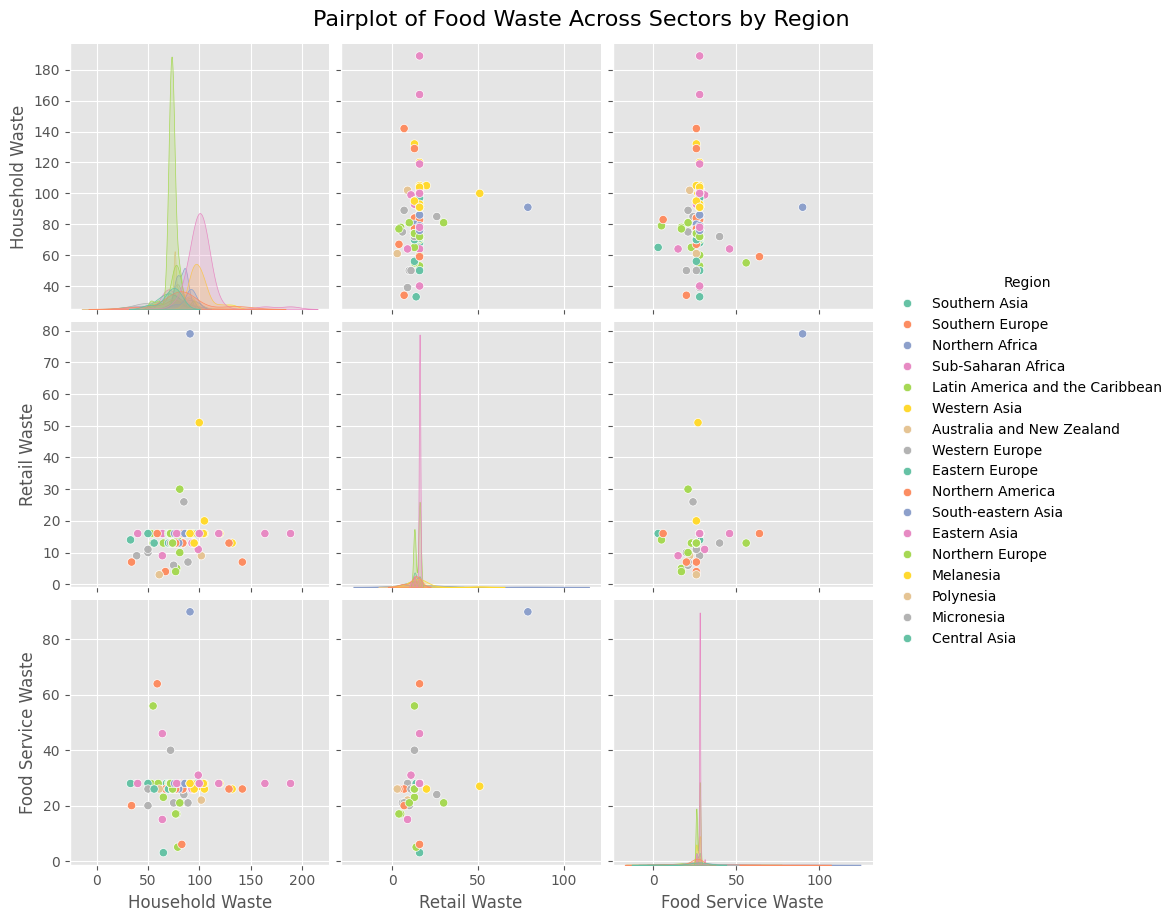

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df_cleaned = pd.read_csv('/content/sample_data/updated_food_waste_data.csv')

# Select relevant columns for the pairplot
columns_to_plot = [
    'Household estimate (kg/capita/year)',
    'Retail estimate (kg/capita/year)',
    'Food service estimate (kg/capita/year)',
    'Region'
]

# Filter the data for visualization
df_visualization = df_cleaned[columns_to_plot]

# Rename columns for better readability in the plot
df_visualization.rename(
    columns={
        'Household estimate (kg/capita/year)': 'Household Waste',
        'Retail estimate (kg/capita/year)': 'Retail Waste',
        'Food service estimate (kg/capita/year)': 'Food Service Waste'
    },
    inplace=True
)

# Create a pairplot
sns.pairplot(
    df_visualization,
    hue='Region',  # Color by region
    diag_kind='kde',  # Kernel Density Estimate on the diagonal
    palette='Set2',
    height=3
)

# Set the title
plt.suptitle('Pairplot of Food Waste Across Sectors by Region', y=1.02, fontsize=16)

# Show the plot
plt.show()


<ipython-input-23-0a95ff8898a0>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


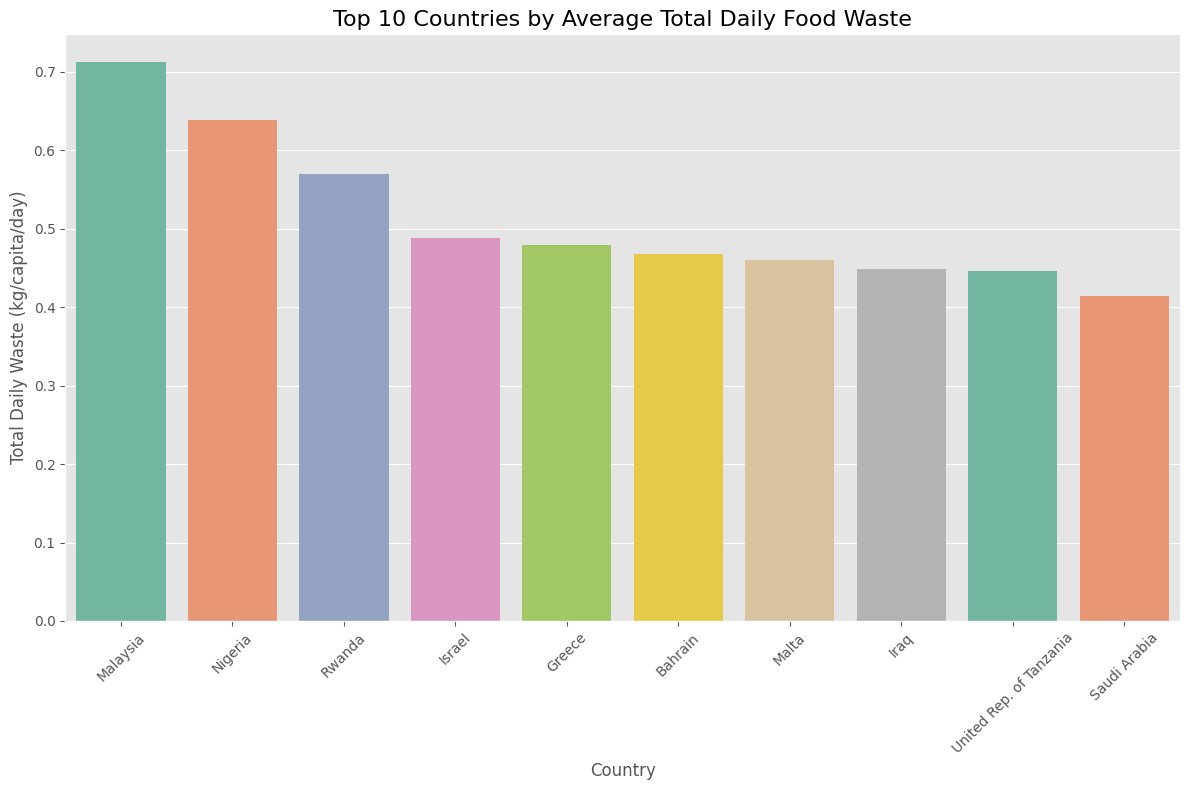

In [ ]:
# Ensure that df_cleaned contains the loaded dataset
# Example: df_cleaned is already loaded and processed

# Calculate average daily waste for each sector
df_cleaned['Household Daily Waste (kg/capita/day)'] = df_cleaned['Household estimate (kg/capita/year)'] / 365
df_cleaned['Retail Daily Waste (kg/capita/day)'] = df_cleaned['Retail estimate (kg/capita/year)'] / 365
df_cleaned['Food Service Daily Waste (kg/capita/day)'] = df_cleaned['Food service estimate (kg/capita/year)'] / 365

# Optionally calculate total daily waste
df_cleaned['Total Daily Waste (kg/capita/day)'] = (
    df_cleaned['Household estimate (kg/capita/year)'] +
    df_cleaned['Retail estimate (kg/capita/year)'] +
    df_cleaned['Food service estimate (kg/capita/year)']
) / 365

# Sort data by total daily waste
df_sorted = df_cleaned.sort_values(by='Total Daily Waste (kg/capita/day)', ascending=False).head(10)

# Plot the top 10 countries by total daily waste
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_sorted,
    x='Country',
    y='Total Daily Waste (kg/capita/day)',
    palette='Set2'
)
plt.title('Top 10 Countries by Average Total Daily Food Waste', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Daily Waste (kg/capita/day)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


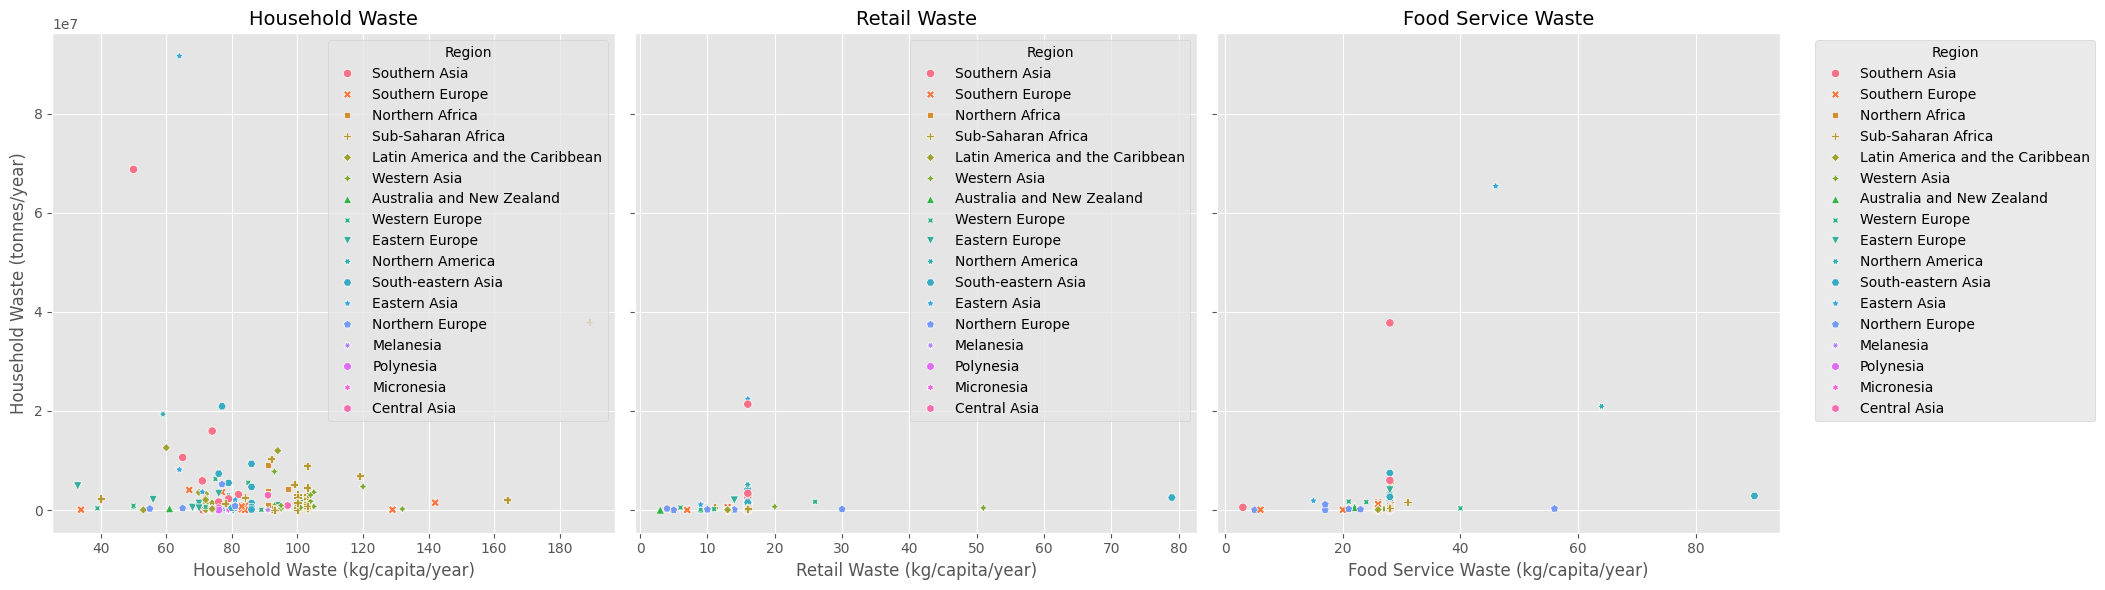

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Household Waste
sns.scatterplot(
    data=df_cleaned,
    x='Household estimate (kg/capita/year)',
    y='Household estimate (tonnes/year)',
    hue='Region',
    style='Region',
    ax=axes[0]
)
axes[0].set_title("Household Waste", fontsize=14)
axes[0].set_xlabel("Household Waste (kg/capita/year)", fontsize=12)
axes[0].set_ylabel("Household Waste (tonnes/year)", fontsize=12)

# Retail Waste
sns.scatterplot(
    data=df_cleaned,
    x='Retail estimate (kg/capita/year)',
    y='Retail estimate (tonnes/year)',
    hue='Region',
    style='Region',
    ax=axes[1]
)
axes[1].set_title("Retail Waste", fontsize=14)
axes[1].set_xlabel("Retail Waste (kg/capita/year)", fontsize=12)
axes[1].set_ylabel("")  # Y-axis label removed for middle plot to avoid redundancy

# Food Service Waste
sns.scatterplot(
    data=df_cleaned,
    x='Food service estimate (kg/capita/year)',
    y='Food service estimate (tonnes/year)',
    hue='Region',
    style='Region',
    ax=axes[2]
)
axes[2].set_title("Food Service Waste", fontsize=14)
axes[2].set_xlabel("Food Service Waste (kg/capita/year)", fontsize=12)
axes[2].set_ylabel("")  # Y-axis label removed for right plot to avoid redundancy

# Adjust layout and show the plot
fig.tight_layout()
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.show()


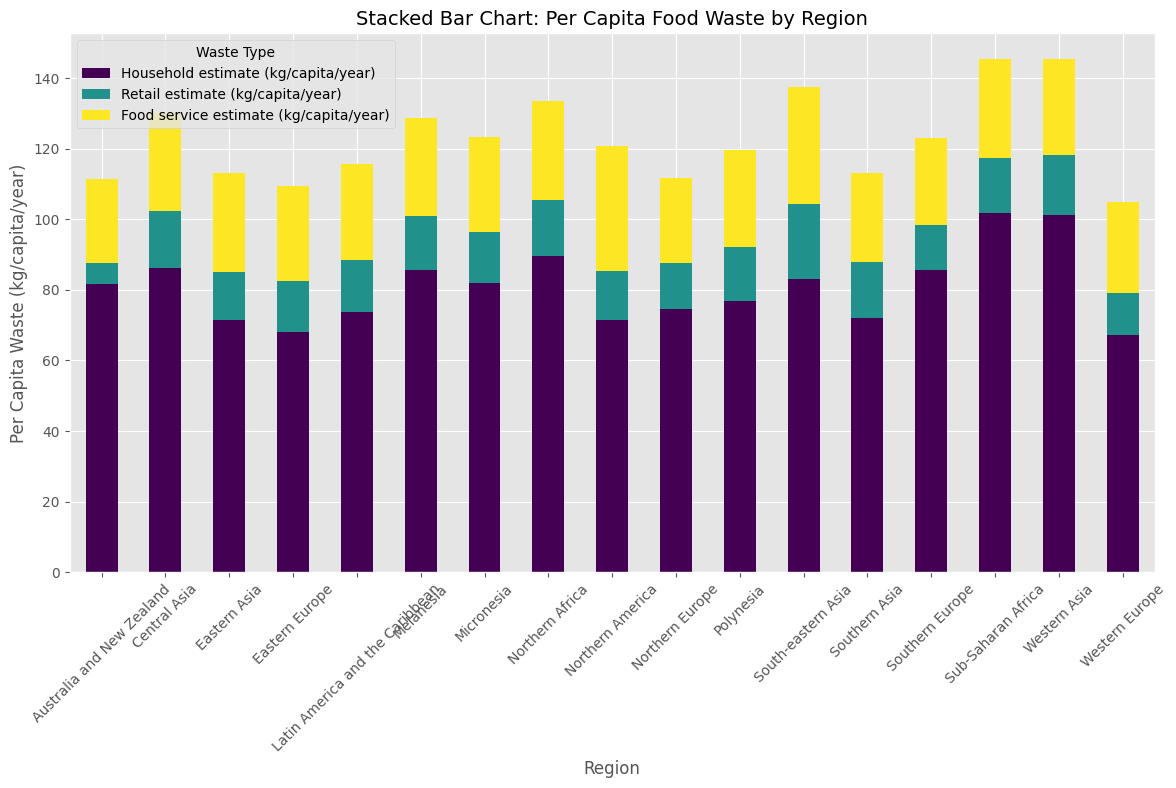

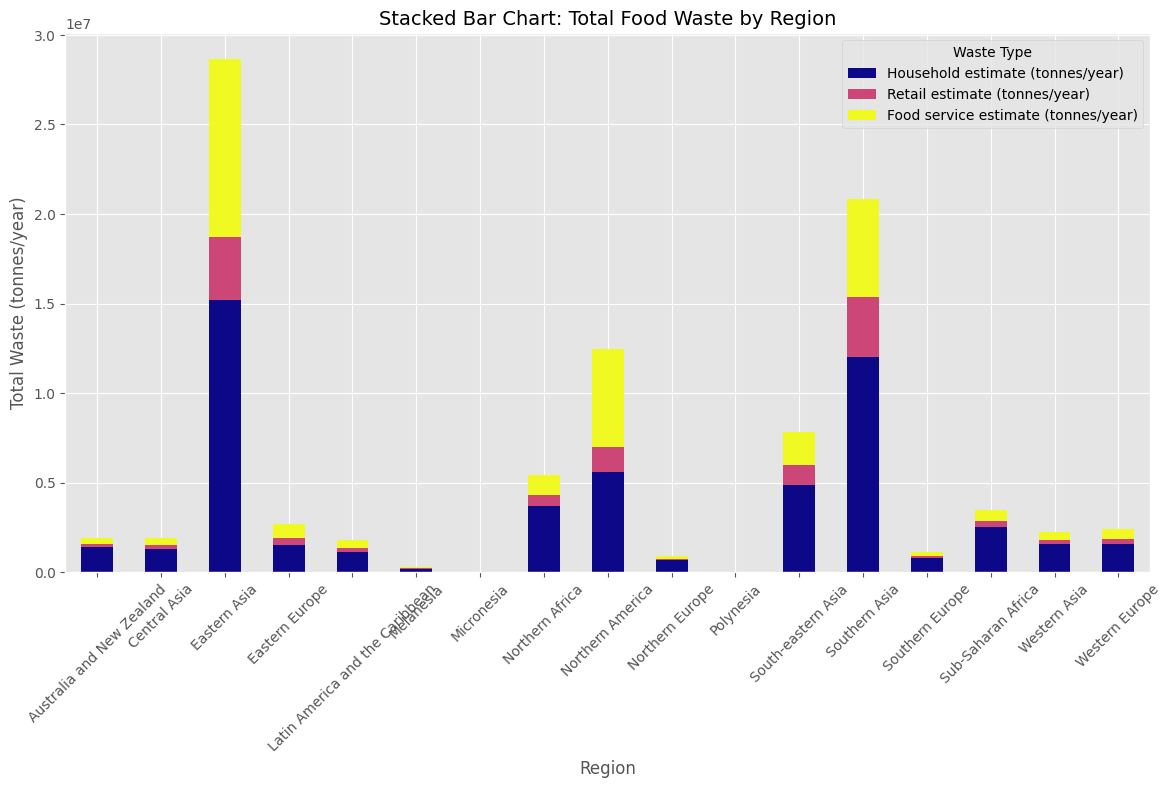

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Summarize waste by region
df_region_summary = df_cleaned.groupby('Region').agg({
    'Household estimate (kg/capita/year)': 'mean',
    'Retail estimate (kg/capita/year)': 'mean',
    'Food service estimate (kg/capita/year)': 'mean',
    'Household estimate (tonnes/year)': 'mean',
    'Retail estimate (tonnes/year)': 'mean',
    'Food service estimate (tonnes/year)': 'mean'
}).reset_index()

# Plotting Stacked Bar Chart for per capita waste
df_region_per_capita = df_region_summary[['Region',
                                          'Household estimate (kg/capita/year)',
                                          'Retail estimate (kg/capita/year)',
                                          'Food service estimate (kg/capita/year)']]

df_region_per_capita.set_index('Region').plot(
    kind='bar', stacked=True, figsize=(14, 7), colormap='viridis'
)
plt.title("Stacked Bar Chart: Per Capita Food Waste by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Per Capita Waste (kg/capita/year)", fontsize=12)
plt.legend(title="Waste Type")
plt.xticks(rotation=45)
plt.show()

# Plotting Stacked Bar Chart for total waste
df_region_total = df_region_summary[['Region',
                                      'Household estimate (tonnes/year)',
                                      'Retail estimate (tonnes/year)',
                                      'Food service estimate (tonnes/year)']]

df_region_total.set_index('Region').plot(
    kind='bar', stacked=True, figsize=(14, 7), colormap='plasma'
)
plt.title("Stacked Bar Chart: Total Food Waste by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Waste (tonnes/year)", fontsize=12)
plt.legend(title="Waste Type")
plt.xticks(rotation=45)
plt.show()



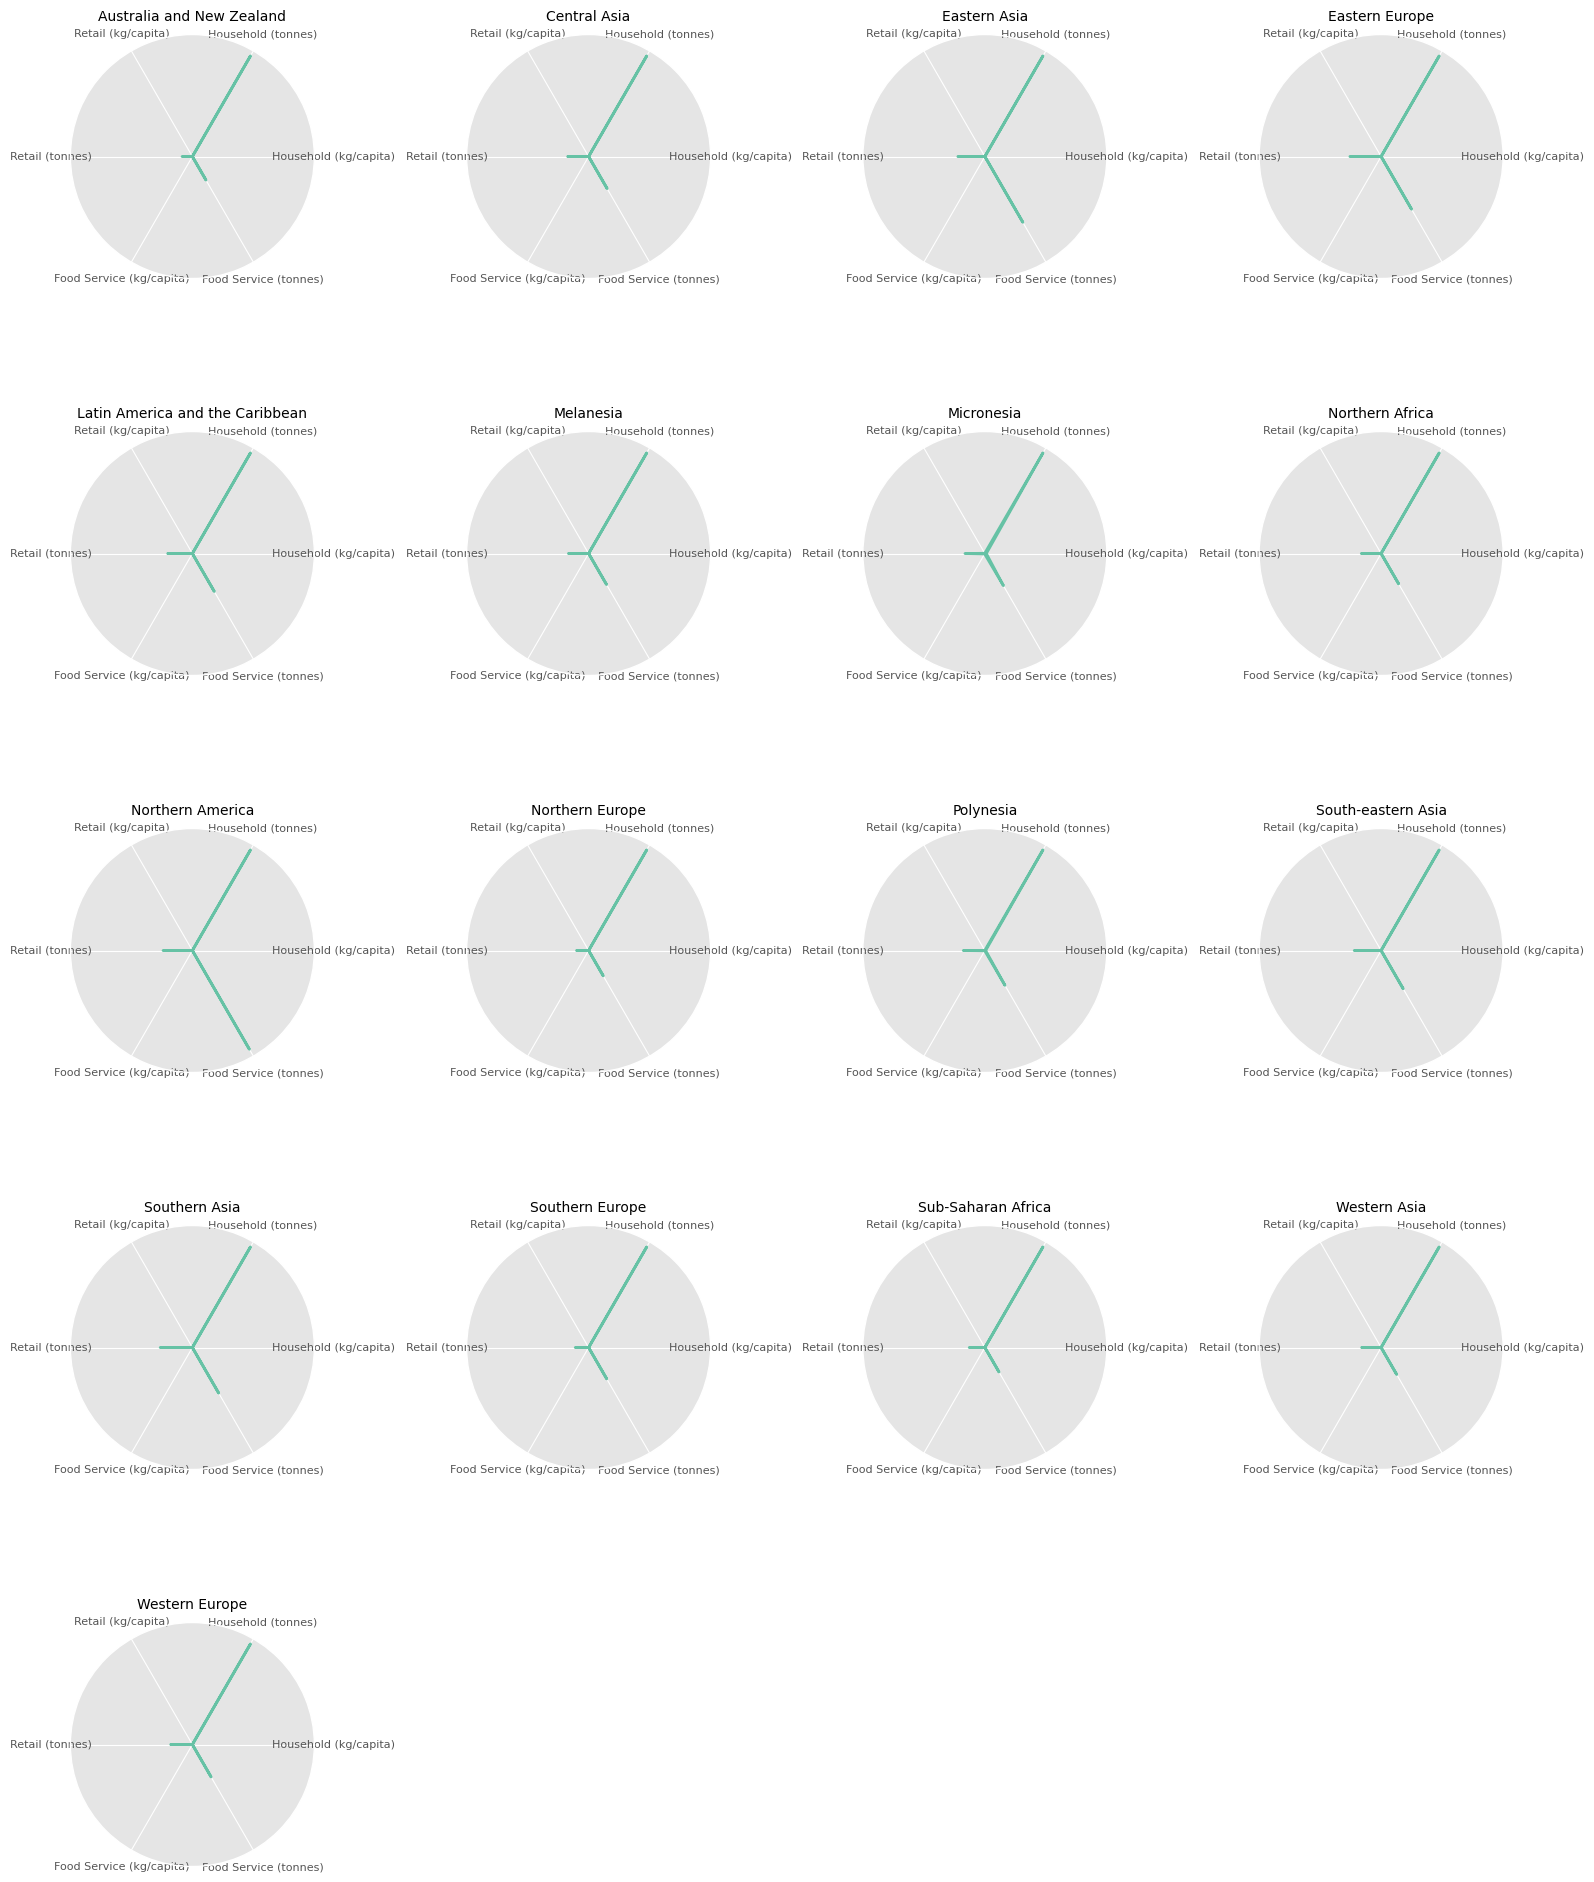

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Summarize waste by region
df_region_summary = df_cleaned.groupby('Region').agg({
    'Household estimate (kg/capita/year)': 'mean',
    'Household estimate (tonnes/year)': 'mean',
    'Retail estimate (kg/capita/year)': 'mean',
    'Retail estimate (tonnes/year)': 'mean',
    'Food service estimate (kg/capita/year)': 'mean',
    'Food service estimate (tonnes/year)': 'mean'
}).reset_index()

# Strip any leading/trailing spaces in the 'Region' column
df_region_summary['Region'] = df_region_summary['Region'].str.strip()

# Get all unique regions
regions = df_region_summary['Region'].unique()

# Data categories for the radar chart
categories = [
    'Household (kg/capita)', 'Household (tonnes)',
    'Retail (kg/capita)', 'Retail (tonnes)',
    'Food Service (kg/capita)', 'Food Service (tonnes)'
]

# Set up grid dimensions
num_regions = len(regions)
cols = 4  # Number of columns in the grid
rows = (num_regions // cols) + (num_regions % cols > 0)  # Calculate required rows

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4), subplot_kw=dict(polar=True))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Generate radar charts for each region
for idx, selected_region in enumerate(regions):
    # Filter data for the selected region
    region_data = df_region_summary[df_region_summary['Region'] == selected_region]

    if not region_data.empty:
        # Data for radar chart
        values = region_data.iloc[0, 1:].values  # Extract data for the selected region
        values = np.append(values, values[0])  # Append the first value to close the radar chart

        # Define angles for the radar chart
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
        angles += angles[:1]  # Complete the circle

        # Plot on the corresponding subplot
        ax = axes[idx]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=selected_region)
        ax.fill(angles, values, alpha=0.25)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontsize=8)
        ax.set_yticks([])
        ax.set_title(selected_region, fontsize=10, pad=10)
    else:
        print(f"No data available for the selected region: {selected_region}.")

# Hide any unused subplots
for idx in range(len(regions), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()


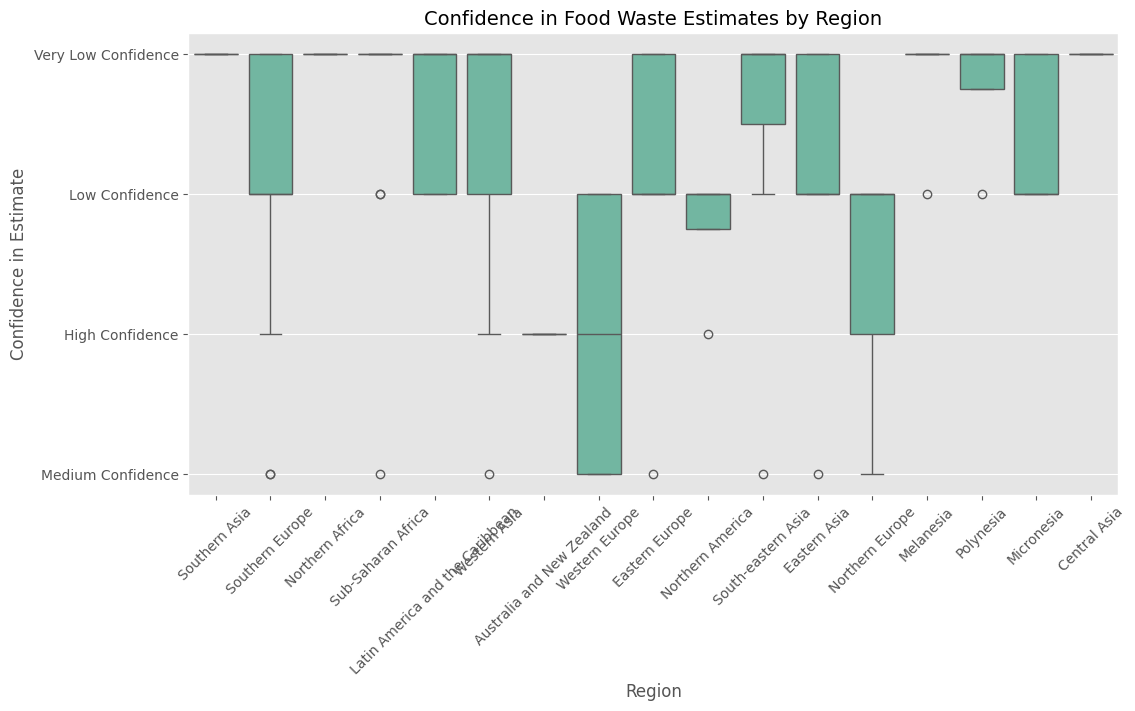

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confidence levels by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Region', y='Confidence in estimate')
plt.title("Confidence in Food Waste Estimates by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Confidence in Estimate", fontsize=12)
plt.xticks(rotation=45)
plt.show()


<ipython-input-31-036aed133390>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-31-036aed133390>:8: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


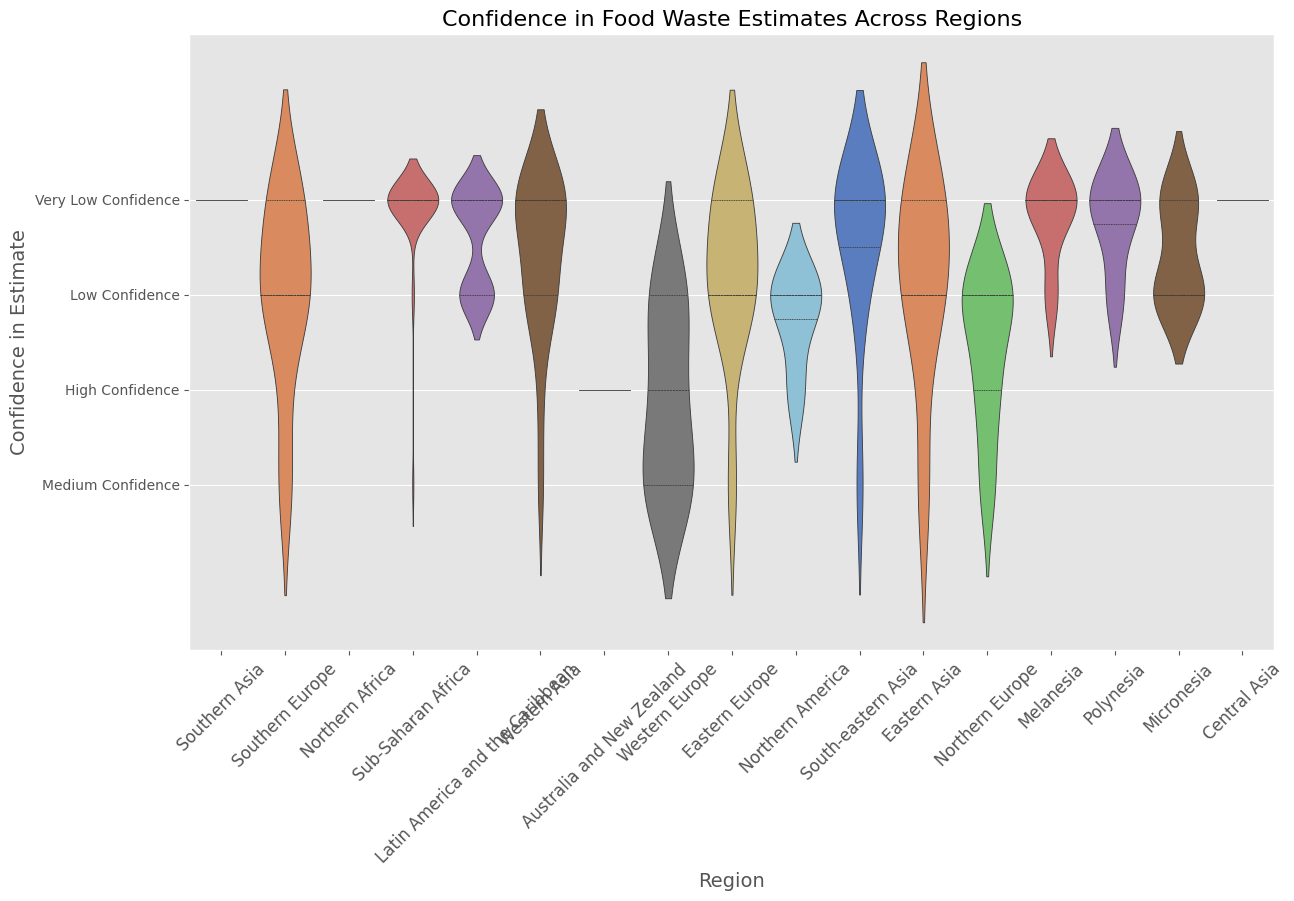

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(14, 8))

# Create the violin plot
sns.violinplot(
    data=df_cleaned,
    x='Region',
    y='Confidence in estimate',
    inner="quartile",  # Shows quartiles inside the violin plot
    scale="width",     # Scale violins by the number of observations
    palette="muted"
)

# Add titles and labels
plt.title("Confidence in Food Waste Estimates Across Regions", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Confidence in Estimate", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()


<ipython-input-33-9c7b6ed5ba20>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-33-9c7b6ed5ba20>:8: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


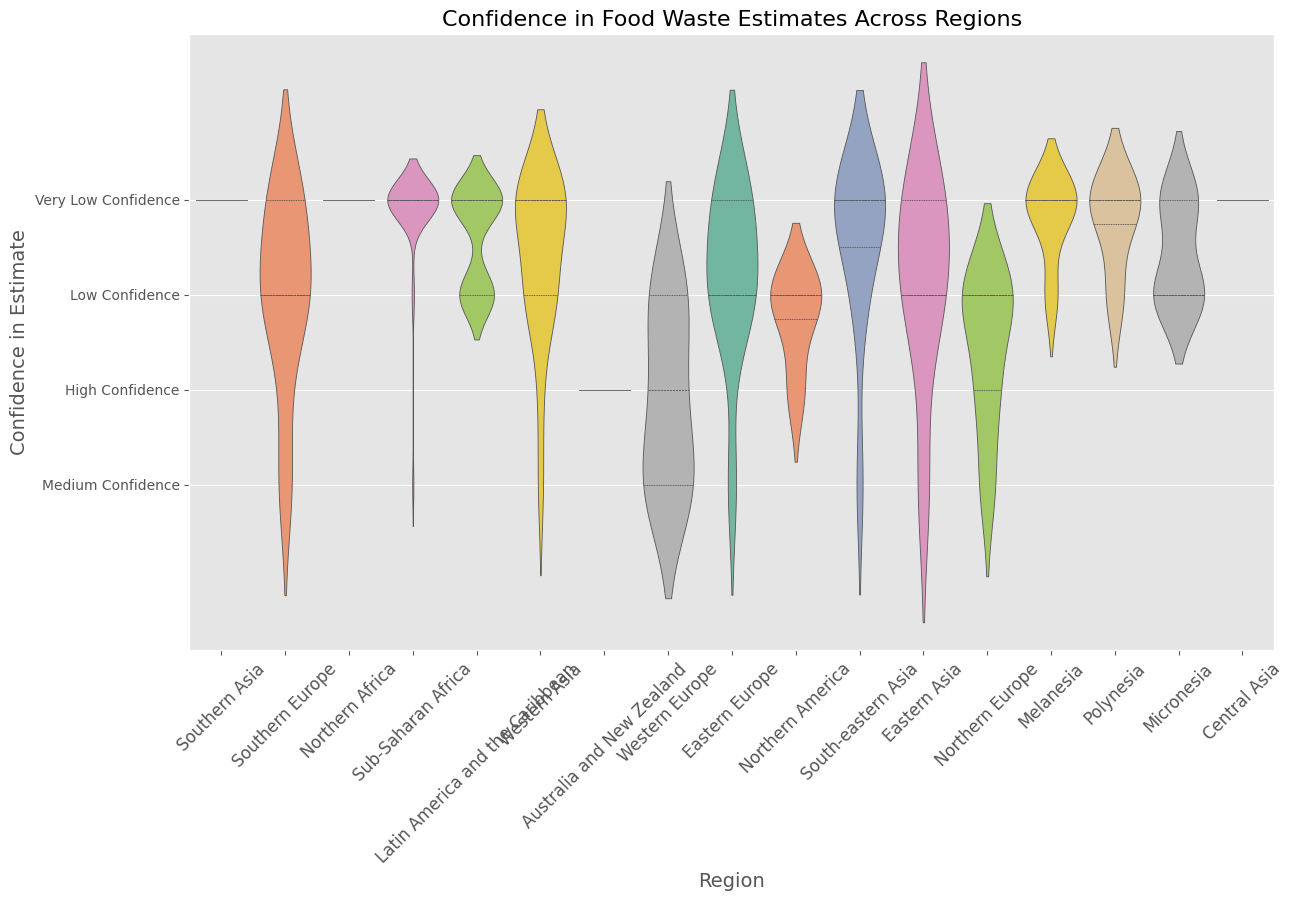

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(14, 8))

# Create the violin plot with the "Set2" palette
sns.violinplot(
    data=df_cleaned,
    x='Region',
    y='Confidence in estimate',
    inner="quartile",  # Shows quartiles inside the violin plot
    scale="width",     # Scale violins by the number of observations
    palette="Set2"     # Use the Set2 color palette for a softer look
)

# Add titles and labels
plt.title("Confidence in Food Waste Estimates Across Regions", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Confidence in Estimate", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()


In [ ]:
import plotly.express as px

# Example dataset summarizing food waste by sector and region
df_treemap = df_cleaned.groupby(['Region']).agg({
    'Household estimate (kg/capita/year)': 'sum',
    'Retail estimate (kg/capita/year)': 'sum',
    'Food service estimate (kg/capita/year)': 'sum'
}).reset_index()

# Melt the data for a hierarchical structure
df_treemap = df_treemap.melt(
    id_vars="Region",
    value_vars=[
        'Household estimate (kg/capita/year)',
        'Retail estimate (kg/capita/year)',
        'Food service estimate (kg/capita/year)'
    ],
    var_name="Sector",
    value_name="Contribution"
)

# Create the tree map with a custom teal-to-rose gradient
fig = px.treemap(
    df_treemap,
    path=['Region', 'Sector'],  # Hierarchical grouping: Region -> Sector
    values='Contribution',      # Size of the blocks
    color='Contribution',       # Color based on contribution values
    color_continuous_scale=[
        "#006d77",  # Teal
        "#83c5be",  # Light Teal
        "#edf6f9",  # Neutral
        "#ffddd2",  # Light Rose
        "#e29578"   # Rose
    ],
    title="Tree Map of Food Waste Contributions by Region and Sector"
)

# Update layout for better visuals
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


In [ ]:
import plotly.express as px

# Example dataset summarizing food waste by sector and region
df_treemap = df_cleaned.groupby(['Region']).agg({
    'Household estimate (kg/capita/year)': 'sum',
    'Retail estimate (kg/capita/year)': 'sum',
    'Food service estimate (kg/capita/year)': 'sum'
}).reset_index()

# Melt the data for a hierarchical structure
df_treemap = df_treemap.melt(
    id_vars="Region",
    value_vars=[
        'Household estimate (kg/capita/year)',
        'Retail estimate (kg/capita/year)',
        'Food service estimate (kg/capita/year)'
    ],
    var_name="Sector",
    value_name="Contribution"
)

# Create the tree map with the Blues color palette
fig = px.treemap(
    df_treemap,
    path=['Region', 'Sector'],  # Hierarchical grouping: Region -> Sector
    values='Contribution',      # Size of the blocks
    color='Contribution',       # Color based on contribution values
    color_continuous_scale=px.colors.sequential.Blues,  # Blues gradient
    title="Tree Map of Food Waste Contributions by Region and Sector"
)

# Update layout for better visuals
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


In [ ]:
from graphviz import Digraph

# Create a flowchart for Data Sources and Techniques
dot = Digraph(comment='Data Sources and Techniques')

# Add nodes
dot.node('A', 'Data Source\n- UNEP Food Waste Index (2021)\n- Kaggle Dataset (CSV)')
dot.node('B', 'Data Selection\n- Filtered countries\n- Focus on completeness')
dot.node('C', 'Data Cleaning\n- Standardized names\n- Removed missing values')
dot.node('D', 'Data Integration\n- Combined sector data\n- Created Total Waste')
dot.node('E', 'Data Formatting\n- Ensured compatibility\n- Labeled numeric fields')
dot.node('F', 'Data Validation\n- Verified cleaned data\n- Ready for visualization')

# Connect nodes
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF'])

# Render the graph
dot.render('data_sources_techniques_diagram', format='png', cleanup=True)

print("Diagram saved as data_sources_techniques_diagram.png")


Diagram saved as data_sources_techniques_diagram.png
